In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot3 as uproot
import pandas as pd
import numpy as np
import math
from tqdm import tqdm

import kdar_functions as kdar
import general_functions as utils

import importlib



In [2]:
importlib.reload(kdar)
importlib.reload(utils)

<module 'general_functions' from '/Users/bbogart/Documents/analysisCode/kdar_bdt/general_functions.py'>

In [3]:
single_run = False

In [4]:
ssm_bdt_vars = [
          "ssm_Nsm",
          "ssm_Nsm_wivtx",
          "ssm_dq_dx_fwd_1",
          "ssm_dq_dx_fwd_2",
          "ssm_dq_dx_fwd_3",
          "ssm_dq_dx_fwd_4",
          "ssm_dq_dx_fwd_5",
          "ssm_dq_dx_bck_1",
          "ssm_dq_dx_bck_2",
          "ssm_dq_dx_bck_3",
          "ssm_dq_dx_bck_4",
          "ssm_dq_dx_bck_5",
          "ssm_d_dq_dx_fwd_12",
          "ssm_d_dq_dx_fwd_23",
          "ssm_d_dq_dx_fwd_34",
          "ssm_d_dq_dx_fwd_45",
          "ssm_d_dq_dx_bck_12",
          "ssm_d_dq_dx_bck_23",
          "ssm_d_dq_dx_bck_34",
          "ssm_d_dq_dx_bck_45",
          "ssm_max_dq_dx_fwd_3",
          "ssm_max_dq_dx_fwd_5",
          "ssm_max_dq_dx_bck_3",
          "ssm_max_dq_dx_bck_5",
          "ssm_max_d_dq_dx_fwd_3",
          "ssm_max_d_dq_dx_fwd_5",
          "ssm_max_d_dq_dx_bck_3",
          "ssm_max_d_dq_dx_bck_5",
          "ssm_medium_dq_dx",
          "ssm_medium_dq_dx_bp",
          "ssm_angle_to_z",
          "ssm_angle_to_target",
          "ssm_angle_to_absorber",
          "ssm_angle_to_vertical",
          "ssm_x_dir",
          "ssm_y_dir",
          "ssm_z_dir",
          "ssm_kine_energy",
          "ssm_kine_energy_reduced",
          "ssm_vtx_activity",
          "ssm_pdg",
          "ssm_dQ_dx_cut",
          "ssm_score_mu_fwd",
          "ssm_score_p_fwd",
          "ssm_score_e_fwd",
          "ssm_score_mu_bck",
          "ssm_score_p_bck",
          "ssm_score_e_bck",
          "ssm_score_mu_fwd_bp",
          "ssm_score_p_fwd_bp",
          "ssm_score_e_fwd_bp",
          "ssm_length",
          "ssm_direct_length",
          "ssm_length_ratio",
          "ssm_max_dev",
          "ssm_n_prim_tracks_1",
          "ssm_n_prim_tracks_3",
          "ssm_n_prim_tracks_5",
          "ssm_n_prim_tracks_8",
          "ssm_n_prim_tracks_11",
          "ssm_n_all_tracks_1",
          "ssm_n_all_tracks_3",
          "ssm_n_all_tracks_5",
          "ssm_n_all_tracks_8",
          "ssm_n_all_tracks_11",
          "ssm_n_daughter_tracks_1",
          "ssm_n_daughter_tracks_3",
          "ssm_n_daughter_tracks_5",
          "ssm_n_daughter_tracks_8",
          "ssm_n_daughter_tracks_11",
          "ssm_n_daughter_all_1",
          "ssm_n_daughter_all_3",
          "ssm_n_daughter_all_5",
          "ssm_n_daughter_all_8",
          "ssm_n_daughter_all_11",
    
          "ssm_prim_track1_pdg",
          "ssm_prim_track1_score_mu_fwd",
          "ssm_prim_track1_score_p_fwd",
          "ssm_prim_track1_score_e_fwd",
          "ssm_prim_track1_score_mu_bck",
          "ssm_prim_track1_score_p_bck",
          "ssm_prim_track1_score_e_bck",
          "ssm_prim_track1_length",
          "ssm_prim_track1_direct_length",
          "ssm_prim_track1_length_ratio",
          "ssm_prim_track1_max_dev",
          "ssm_prim_track1_kine_energy_range",
          "ssm_prim_track1_kine_energy_range_mu",
          "ssm_prim_track1_kine_energy_range_p",
          "ssm_prim_track1_kine_energy_range_e",
          "ssm_prim_track1_kine_energy_cal",
          "ssm_prim_track1_medium_dq_dx",
          "ssm_prim_track1_x_dir",
          "ssm_prim_track1_y_dir",
          "ssm_prim_track1_z_dir",
          "ssm_prim_track1_add_daught_track_counts_1",
          "ssm_prim_track1_add_daught_all_counts_1",
          "ssm_prim_track1_add_daught_track_counts_5",
          "ssm_prim_track1_add_daught_all_counts_5",
          "ssm_prim_track1_add_daught_track_counts_11",
          "ssm_prim_track1_add_daught_all_counts_11",
    
          "ssm_prim_track2_pdg",
          "ssm_prim_track2_score_mu_fwd",
          "ssm_prim_track2_score_p_fwd",
          "ssm_prim_track2_score_e_fwd",
          "ssm_prim_track2_score_mu_bck",
          "ssm_prim_track2_score_p_bck",
          "ssm_prim_track2_score_e_bck",
          "ssm_prim_track2_length",
          "ssm_prim_track2_direct_length",
          "ssm_prim_track2_length_ratio",
          "ssm_prim_track2_max_dev",
          "ssm_prim_track2_kine_energy_range",
          "ssm_prim_track2_kine_energy_range_mu",
          "ssm_prim_track2_kine_energy_range_p",
          "ssm_prim_track2_kine_energy_range_e",
          "ssm_prim_track2_kine_energy_cal",
          "ssm_prim_track2_medium_dq_dx",
          "ssm_prim_track2_x_dir",
          "ssm_prim_track2_y_dir",
          "ssm_prim_track2_z_dir",
          "ssm_prim_track2_add_daught_track_counts_1",
          "ssm_prim_track2_add_daught_all_counts_1",
          "ssm_prim_track2_add_daught_track_counts_5",
          "ssm_prim_track2_add_daught_all_counts_5",
          "ssm_prim_track2_add_daught_track_counts_11",
          "ssm_prim_track2_add_daught_all_counts_11",
    
          "ssm_daught_track1_pdg",
          "ssm_daught_track1_score_mu_fwd",
          "ssm_daught_track1_score_p_fwd",
          "ssm_daught_track1_score_e_fwd",
          "ssm_daught_track1_score_mu_bck",
          "ssm_daught_track1_score_p_bck",
          "ssm_daught_track1_score_e_bck",
          "ssm_daught_track1_length",
          "ssm_daught_track1_direct_length",
          "ssm_daught_track1_length_ratio",
          "ssm_daught_track1_max_dev",
          "ssm_daught_track1_kine_energy_range",
          "ssm_daught_track1_kine_energy_range_mu",
          "ssm_daught_track1_kine_energy_range_p",
          "ssm_daught_track1_kine_energy_range_e",
          "ssm_daught_track1_kine_energy_cal",
          "ssm_daught_track1_medium_dq_dx",
          "ssm_daught_track1_x_dir",
          "ssm_daught_track1_y_dir",
          "ssm_daught_track1_z_dir",
          "ssm_daught_track1_add_daught_track_counts_1",
          "ssm_daught_track1_add_daught_all_counts_1",
          "ssm_daught_track1_add_daught_track_counts_5",
          "ssm_daught_track1_add_daught_all_counts_5",
          "ssm_daught_track1_add_daught_track_counts_11",
          "ssm_daught_track1_add_daught_all_counts_11",
    
          "ssm_daught_track2_pdg",
          "ssm_daught_track2_score_mu_fwd",
          "ssm_daught_track2_score_p_fwd",
          "ssm_daught_track2_score_e_fwd",
          "ssm_daught_track2_score_mu_bck",
          "ssm_daught_track2_score_p_bck",
          "ssm_daught_track2_score_e_bck",
          "ssm_daught_track2_length",
          "ssm_daught_track2_direct_length",
          "ssm_daught_track2_length_ratio",
          "ssm_daught_track2_max_dev",
          "ssm_daught_track2_kine_energy_range",
          "ssm_daught_track2_kine_energy_range_mu",
          "ssm_daught_track2_kine_energy_range_p",
          "ssm_daught_track2_kine_energy_range_e",
          "ssm_daught_track2_kine_energy_cal",
          "ssm_daught_track2_medium_dq_dx",
          "ssm_daught_track2_x_dir",
          "ssm_daught_track2_y_dir",
          "ssm_daught_track2_z_dir",
          "ssm_daught_track2_add_daught_track_counts_1",
          "ssm_daught_track2_add_daught_all_counts_1",
          "ssm_daught_track2_add_daught_track_counts_5",
          "ssm_daught_track2_add_daught_all_counts_5",
          "ssm_daught_track2_add_daught_track_counts_11",
          "ssm_daught_track2_add_daught_all_counts_11",
    
          "ssm_prim_shw1_pdg",
          "ssm_prim_shw1_score_mu_fwd",
          "ssm_prim_shw1_score_p_fwd",
          "ssm_prim_shw1_score_e_fwd",
          "ssm_prim_shw1_score_mu_bck",
          "ssm_prim_shw1_score_p_bck",
          "ssm_prim_shw1_score_e_bck",
          "ssm_prim_shw1_length",
          "ssm_prim_shw1_direct_length",
          "ssm_prim_shw1_length_ratio",
          "ssm_prim_shw1_max_dev",
          "ssm_prim_shw1_kine_energy_range",
          "ssm_prim_shw1_kine_energy_range_mu",
          "ssm_prim_shw1_kine_energy_range_p",
          "ssm_prim_shw1_kine_energy_range_e",
          "ssm_prim_shw1_kine_energy_cal",
          'ssm_prim_shw1_kine_energy_best',
          "ssm_prim_shw1_medium_dq_dx",
          "ssm_prim_shw1_x_dir",
          "ssm_prim_shw1_y_dir",
          "ssm_prim_shw1_z_dir",
          "ssm_prim_shw1_add_daught_track_counts_1",
          "ssm_prim_shw1_add_daught_all_counts_1",
          "ssm_prim_shw1_add_daught_track_counts_5",
          "ssm_prim_shw1_add_daught_all_counts_5",
          "ssm_prim_shw1_add_daught_track_counts_11",
          "ssm_prim_shw1_add_daught_all_counts_11",
    
          "ssm_prim_shw2_pdg",
          "ssm_prim_shw2_score_mu_fwd",
          "ssm_prim_shw2_score_p_fwd",
          "ssm_prim_shw2_score_e_fwd",
          "ssm_prim_shw2_score_mu_bck",
          "ssm_prim_shw2_score_p_bck",
          "ssm_prim_shw2_score_e_bck",
          "ssm_prim_shw2_length",
          "ssm_prim_shw2_direct_length",
          "ssm_prim_shw2_length_ratio",
          "ssm_prim_shw2_max_dev",
          "ssm_prim_shw2_kine_energy_range",
          "ssm_prim_shw2_kine_energy_range_mu",
          "ssm_prim_shw2_kine_energy_range_p",
          "ssm_prim_shw2_kine_energy_range_e",
          "ssm_prim_shw2_kine_energy_cal",
          'ssm_prim_shw2_kine_energy_best',
          "ssm_prim_shw2_medium_dq_dx",
          "ssm_prim_shw2_x_dir",
          "ssm_prim_shw2_y_dir",
          "ssm_prim_shw2_z_dir",
          "ssm_prim_shw2_add_daught_track_counts_1",
          "ssm_prim_shw2_add_daught_all_counts_1",
          "ssm_prim_shw2_add_daught_track_counts_5",
          "ssm_prim_shw2_add_daught_all_counts_5",
          "ssm_prim_shw2_add_daught_track_counts_11",
          "ssm_prim_shw2_add_daught_all_counts_11",
    
          "ssm_daught_shw1_pdg",
          "ssm_daught_shw1_score_mu_fwd",
          "ssm_daught_shw1_score_p_fwd",
          "ssm_daught_shw1_score_e_fwd",
          "ssm_daught_shw1_score_mu_bck",
          "ssm_daught_shw1_score_p_bck",
          "ssm_daught_shw1_score_e_bck",
          "ssm_daught_shw1_length",
          "ssm_daught_shw1_direct_length",
          "ssm_daught_shw1_length_ratio",
          "ssm_daught_shw1_max_dev",
          "ssm_daught_shw1_kine_energy_range",
          "ssm_daught_shw1_kine_energy_range_mu",
          "ssm_daught_shw1_kine_energy_range_p",
          "ssm_daught_shw1_kine_energy_range_e",
          "ssm_daught_shw1_kine_energy_cal",
          'ssm_daught_shw1_kine_energy_best',
          "ssm_daught_shw1_medium_dq_dx",
          "ssm_daught_shw1_x_dir",
          "ssm_daught_shw1_y_dir",
          "ssm_daught_shw1_z_dir",
          "ssm_daught_shw1_add_daught_track_counts_1",
          "ssm_daught_shw1_add_daught_all_counts_1",
          "ssm_daught_shw1_add_daught_track_counts_5",
          "ssm_daught_shw1_add_daught_all_counts_5",
          "ssm_daught_shw1_add_daught_track_counts_11",
          "ssm_daught_shw1_add_daught_all_counts_11",
    
          "ssm_daught_shw2_pdg",
          "ssm_daught_shw2_score_mu_fwd",
          "ssm_daught_shw2_score_p_fwd",
          "ssm_daught_shw2_score_e_fwd",
          "ssm_daught_shw2_score_mu_bck",
          "ssm_daught_shw2_score_p_bck",
          "ssm_daught_shw2_score_e_bck",
          "ssm_daught_shw2_length",
          "ssm_daught_shw2_direct_length",
          "ssm_daught_shw2_length_ratio",
          "ssm_daught_shw2_max_dev",
          "ssm_daught_shw2_kine_energy_range",
          "ssm_daught_shw2_kine_energy_range_mu",
          "ssm_daught_shw2_kine_energy_range_p",
          "ssm_daught_shw2_kine_energy_range_e",
          "ssm_daught_shw2_kine_energy_cal",
          'ssm_daught_shw2_kine_energy_best',
          "ssm_daught_shw2_medium_dq_dx",
          "ssm_daught_shw2_x_dir",
          "ssm_daught_shw2_y_dir",
          "ssm_daught_shw2_z_dir",
          "ssm_daught_shw2_add_daught_track_counts_1",
          "ssm_daught_shw2_add_daught_all_counts_1",
          "ssm_daught_shw2_add_daught_track_counts_5",
          "ssm_daught_shw2_add_daught_all_counts_5",
          "ssm_daught_shw2_add_daught_track_counts_11",
          "ssm_daught_shw2_add_daught_all_counts_11",
    
          "ssm_nu_angle_z",
          "ssm_nu_angle_target",
          "ssm_nu_angle_absorber",
          "ssm_nu_angle_vertical",
          "ssm_prim_nu_angle_z",
          "ssm_prim_nu_angle_target",
          "ssm_prim_nu_angle_absorber",
          "ssm_prim_nu_angle_vertical",
          "ssm_con_nu_angle_z",
          "ssm_con_nu_angle_target",
          "ssm_con_nu_angle_absorber",
          "ssm_con_nu_angle_vertical",
          "ssm_track_angle_z",
          "ssm_track_angle_target",
          "ssm_track_angle_absorber",
          "ssm_track_angle_vertical",
          "ssm_vtxX",
          "ssm_vtxY",
          "ssm_vtxZ",

          "ssm_offvtx_length",
          "ssm_offvtx_energy",
          "ssm_n_offvtx_tracks_1",
          "ssm_n_offvtx_tracks_3",
          "ssm_n_offvtx_tracks_5",
          "ssm_n_offvtx_tracks_8",
          "ssm_n_offvtx_tracks_11",
          "ssm_n_offvtx_showers_1",
          "ssm_n_offvtx_showers_3",
          "ssm_n_offvtx_showers_5",
          "ssm_n_offvtx_showers_8",
          "ssm_n_offvtx_showers_11",
          "ssm_offvtx_track1_pdg",
          "ssm_offvtx_track1_score_mu_fwd",
          "ssm_offvtx_track1_score_p_fwd",
          "ssm_offvtx_track1_score_e_fwd",
          "ssm_offvtx_track1_score_mu_bck",
          "ssm_offvtx_track1_score_p_bck",
          "ssm_offvtx_track1_score_e_bck",
          "ssm_offvtx_track1_length",
          "ssm_offvtx_track1_direct_length",
          "ssm_offvtx_track1_max_dev",
          "ssm_offvtx_track1_kine_energy_range",
          "ssm_offvtx_track1_kine_energy_range_mu",
          "ssm_offvtx_track1_kine_energy_range_p",
          "ssm_offvtx_track1_kine_energy_range_e",
          "ssm_offvtx_track1_kine_energy_cal",
          "ssm_offvtx_track1_medium_dq_dx",
          "ssm_offvtx_track1_x_dir",
          "ssm_offvtx_track1_y_dir",
          "ssm_offvtx_track1_z_dir",
          "ssm_offvtx_track1_dist_mainvtx",
          "ssm_offvtx_shw1_pdg_offvtx",
          "ssm_offvtx_shw1_score_mu_fwd",
          "ssm_offvtx_shw1_score_p_fwd",
          "ssm_offvtx_shw1_score_e_fwd",
          "ssm_offvtx_shw1_score_mu_bck",
          "ssm_offvtx_shw1_score_p_bck",
          "ssm_offvtx_shw1_score_e_bck",
          "ssm_offvtx_shw1_length",
          "ssm_offvtx_shw1_direct_length",
          "ssm_offvtx_shw1_max_dev",
          "ssm_offvtx_shw1_kine_energy_best",
          "ssm_offvtx_shw1_kine_energy_range",
          "ssm_offvtx_shw1_kine_energy_range_mu",
          "ssm_offvtx_shw1_kine_energy_range_p",
          "ssm_offvtx_shw1_kine_energy_range_e",
          "ssm_offvtx_shw1_kine_energy_cal",
          "ssm_offvtx_shw1_medium_dq_dx",
          "ssm_offvtx_shw1_x_dir",
          "ssm_offvtx_shw1_y_dir",
          "ssm_offvtx_shw1_z_dir",
          "ssm_offvtx_shw1_dist_mainvtx",

          "ssm_kine_reco_Enu",
          "ssm_kine_reco_add_energy",
          "ssm_kine_energy_particle",
          "ssm_kine_energy_info",
          "ssm_kine_particle_type",
          "ssm_kine_energy_included",
          "ssm_kine_pio_mass",
          "ssm_kine_pio_flag",
          "ssm_kine_pio_vtx_dis",
          "ssm_kine_pio_energy_1",
          "ssm_kine_pio_theta_1",
          "ssm_kine_pio_phi_1",
          "ssm_kine_pio_dis_1",
          "ssm_kine_pio_energy_2",
          "ssm_kine_pio_theta_2",
          "ssm_kine_pio_phi_2",
          "ssm_kine_pio_dis_2",
          "ssm_kine_pio_angle",
          "ssm_numu_cc_flag",
          "ssm_cosmict_flag_1", 
          "ssm_cosmict_flag_2",  
          "ssm_cosmict_flag_3",  
          "ssm_cosmict_flag_4",  
          "ssm_cosmict_flag_5", 
          "ssm_cosmict_flag_6", 
          "ssm_cosmict_flag_7", 
          "ssm_cosmict_flag_8",  
          "ssm_cosmict_flag_9"
]


bdt_vars = [
    
    "mip_energy",
    "mip_angle_beam", 
    "spt_angle_vertical", 
    "numu_cc_3_track_length",
    "numu_cc_3_max_length_all",
    "cosmict_2_dQ_dx_front",
    "cosmict_2_dQ_dx_end",
    "cosmict_2_angle_beam",
    "cosmict_2_phi",
    "numu_cc_3_max_length",
    "numu_cc_3_max_muon_length",
    
    'cosmict_flag_1',
    'cosmict_flag_2',
    'cosmict_flag_3',
    'cosmict_flag_4',
    'cosmict_flag_5',
    'cosmict_flag_6',
    'cosmict_flag_7',
    'cosmict_flag_8',
    'cosmict_flag_9',
    'cosmict_flag_10',
    'cosmict_flag',
    "numu_score",
    "numu_cc_flag",
    "nue_score"
]

eval_vars = [
    "run",
    "subrun",
    "event",
    'flash_found', 
    'flash_time', 
    'flash_found_asInt', 'match_found_asInt', 
    'flash_measPe', 'flash_predPe', 
    'match_found', 'match_type', 'match_isFC', 'match_isTgm', 'match_notFC_FV', 'match_notFC_SP','match_notFC_DC', 'match_chargeU', 
    'match_chargeV', 'match_chargeY', 'match_energyY', 'light_mismatch', 'match_charge', 'match_energy', 
    'stm_eventtype', 'stm_lowenergy', 'stm_LM', 'stm_TGM', 'stm_STM', 'stm_FullDead', 'stm_clusterlength',
     ]

eval_mc_vars = ["truth_nuPdg","truth_isCC", 
                       'truth_energyInside','match_completeness_energy','truth_vtxInside'
                      ]


kine_vars = ["kine_particle_type", "kine_energy_particle", "kine_reco_add_energy", "kine_energy_info",
                 "kine_pio_mass",
                    "kine_pio_flag",
                    "kine_pio_vtx_dis",
                    "kine_pio_energy_1",
                    "kine_pio_theta_1",
                    "kine_pio_phi_1",
                    "kine_pio_dis_1",
                    "kine_pio_energy_2",
                    "kine_pio_theta_2",
                    "kine_pio_phi_2",
                    "kine_pio_dis_2",
                    "kine_pio_angle"]

kine_mc_vars = ["kine_reco_Enu"]

pf_eval_vars = ["reco_mother","reco_id","reco_pdg","reco_startMomentum",
           "reco_startXYZT","reco_endXYZT",
           "reco_nuvtxX","reco_nuvtxY","reco_nuvtxZ",
           "reco_Ntrack",
           "reco_muonMomentum",
           "reco_protonMomentum",
           "RWM_Time","PMT_TimeProp","PMT_Amp","PMT_Time","PMT_ID","evtTimeNS"]


pf_eval_mc_vars = [
    "truth_nuEnergy",
    "truth_nu_momentum",
    "truth_mother",
    "truth_id",
    "truth_pdg",
    "truth_startMomentum",
    "truth_muonMomentum",
    "truth_vtxX","truth_vtxY","truth_vtxZ","truth_startXYZT",
    #'evtTimeNS_cor',
    'mcflux_dk2gen','mcflux_gen2vtx',"mcflux_vx","mcflux_vy","mcflux_vz",
    "truth_nu_pos",'truth_nuTime',
    #'cor_nu_time','cor_nu_deltatime','cor_nu_time_nospill','cor_nu_time_spill'
]


In [5]:

presel_query = "ssm_kine_reco_Enu>10 and ssm_kine_reco_Enu<350 and match_isFC==1"
presel_query+= " and ssm_kine_pio_mass<50"
presel_query+= " and ssm_cosmict_flag_9==0"
presel_query+= " and ssm_E<270"
presel_query+= " and ssm_kine_energy>0"


In [6]:
names_hiE = 

names_lowE = 

model_hiE = xgb.Booster({'nthread': 4})  # init model
model_hiE.load_model('model_hiE.json')  # load data

model_lowE = xgb.Booster({'nthread': 4})  # init model
model_lowE.load_model('model_lowE.json')  # load data

model_hiE_genie_only = xgb.Booster({'nthread': 4})  # init model
model_hiE_genie_only.load_model('model_hiE_genie_only.json')  # load data

model_lowE_genie_only = xgb.Booster({'nthread': 4})  # init model
model_lowE_genie_only.load_model('model_lowE_genie_only.json')  # load data


def add_bdt_scores_cocktail(df):
    d_pred_df = df[names_hiE]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = model_hiE.predict(d_reg)
    kdar_overlay_df["kdar_score_hiE"] = d_pred 
    
    d_pred_df = df[names_lowE]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = model_lowE.predict(d_reg)
    kdar_overlay_df["kdar_score_lowE"] = d_pred 
    
    ssm_kine_energy = df["ssm_kine_energy"].to_numpy()
    kdar_score_hiE = df["kdar_score_hiE"].to_numpy()
    kdar_score_lowE = df["kdar_score_lowE"].to_numpy()
    
    for i in tqdm(range(len(ssm_kine_energy))):
        if ssm_kine_energy[i]<0: 
            kdar_score_hiE[i] = -999
            kdar_score_lowE[i] = -999
    
    df["kdar_score_hiE"] = kdar_score_hiE
    df["kdar_score_lowE"] = kdar_score_lowE

    return df

def add_bdt_scores_genie_only(df):
    d_pred_df = df[names_hiE]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = model_hiE_genie_only.predict(d_reg)
    kdar_overlay_df["kdar_score_hiE"] = d_pred 
    
    d_pred_df = df[names_lowE]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = model_lowE_genie_only.predict(d_reg)
    kdar_overlay_df["kdar_score_lowE"] = d_pred 
    
    ssm_kine_energy = df["ssm_kine_energy"].to_numpy()
    kdar_score_hiE = df["kdar_score_hiE"].to_numpy()
    kdar_score_lowE = df["kdar_score_lowE"].to_numpy()
    
    for i in tqdm(range(len(ssm_kine_energy))):
        if ssm_kine_energy[i]<0: 
            kdar_score_hiE[i] = -999
            kdar_score_lowE[i] = -999
    
    df["kdar_score_hiE_genie_only"] = kdar_score_hiE
    df["kdar_score_lowE_genie_only"] = kdar_score_lowE

    return df

SyntaxError: invalid syntax (3515425839.py, line 1)

In [6]:
f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgenie_UseGroundStateRemnant_kdar_overlay_run1_train.root")["wcpselection"]
f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
f_kdar_overlay_pot = f_kdar_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
kdar_overlay_POT = np.sum(f_kdar_overlay_pot["pot_tor875good"].to_numpy())
kdar_overlay_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)

del f_kdar_overlay
del f_kdar_overlay_bdt
del f_kdar_overlay_eval
del f_kdar_overlay_pfeval
del f_kdar_overlay_kine

if not single_run: 
    f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgenie_UseGroundStateRemnant_kdar_overlay_run1_train.root")["wcpselection"]
    f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
    f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
    f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    f_kdar_overlay_pot = f_kdar_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
    kdar_overlay_POT = np.sum(f_kdar_overlay_pot["pot_tor875good"].to_numpy())
    kdar_overlay_df_2 = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)
    
    del f_kdar_overlay
    del f_kdar_overlay_bdt
    del f_kdar_overlay_eval
    del f_kdar_overlay_pfeval
    del f_kdar_overlay_kine

    kdar_overlay_df = pd.concat([kdar_overlay_df, kdar_overlay_df_2], sort=False)

kdar_overlay_df = kdar.apply_goodruns(kdar_overlay_df)

kdar_overlay_df["net_weight"] = kdar_overlay_df["weight_cv"].to_numpy()*kdar_overlay_df["weight_spline"].to_numpy()
print("All events",kdar_overlay_df.shape[0],np.sum(kdar_overlay_df["net_weight"].to_numpy()))

kdar_overlay_df["rse_num"] = (kdar_overlay_df["run"].to_numpy() * 100_000_000_000
                         + kdar_overlay_df["subrun"].to_numpy() * 1_000_000
                         + kdar_overlay_df["event"].to_numpy())
kdar_overlay_df = kdar_overlay_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",kdar_overlay_df.shape[0],np.sum(kdar_overlay_df["net_weight"].to_numpy()))

kdar_overlay_df = kdar_overlay_df.query("truth_vtxInside==1")
print("In FV",kdar_overlay_df.shape[0],np.sum(kdar_overlay_df["net_weight"].to_numpy()))

kdar_overlay_df["isEXT"] = [0 for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["isDirt"] = [0 for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["WC_file"] = ["numi_kdar_overlay" for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["POTscaled"] = [1 for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["is_KDAR"] = [1 for i in range(kdar_overlay_df.shape[0])]

All events 85970 87197.45
Duplicates Dropped 42985 43598.727
In FV 40451 41028.164


In [7]:
f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodnuwro_kdar_overlay_run4b_train.root")["wcpselection"]
f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
nuwro_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)

del f_kdar_overlay
del f_kdar_overlay_bdt
del f_kdar_overlay_eval
del f_kdar_overlay_pfeval
del f_kdar_overlay_kine

if not single_run: 
    f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodnuwro_kdar_overlay_run1_train.root")["wcpselection"]
    f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
    f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
    f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    nuwro_df_2 = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)
    
    del f_kdar_overlay
    del f_kdar_overlay_bdt
    del f_kdar_overlay_eval
    del f_kdar_overlay_pfeval
    del f_kdar_overlay_kine

    nuwro_df = pd.concat([nuwro_df, nuwro_df_2], sort=False)

nuwro_df = kdar.apply_goodruns(nuwro_df)

nuwro_df["net_weight"] = [1 for i in range(nuwro_df.shape[0])]
print("All events",nuwro_df.shape[0],np.sum(nuwro_df["net_weight"].to_numpy()))

nuwro_df["rse_num"] = (nuwro_df["run"].to_numpy() * 100_000_000_000
                         + nuwro_df["subrun"].to_numpy() * 1_000_000
                         + nuwro_df["event"].to_numpy())
nuwro_df = nuwro_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",nuwro_df.shape[0],np.sum(nuwro_df["net_weight"].to_numpy()))

nuwro_df = nuwro_df.query("truth_vtxInside==1")
print("In FV",nuwro_df.shape[0],np.sum(nuwro_df["net_weight"].to_numpy()))

nuwro_df["isEXT"] = [0 for i in range(nuwro_df.shape[0])]
nuwro_df["isDirt"] = [0 for i in range(nuwro_df.shape[0])]
nuwro_df["WC_file"] = ["numi_kdar_overlay" for i in range(nuwro_df.shape[0])]
nuwro_df["POTscaled"] = [1 for i in range(nuwro_df.shape[0])]
nuwro_df["is_KDAR"] = [1 for i in range(nuwro_df.shape[0])]


All events 89711 89711
Duplicates Dropped 89711 89711
In FV 36969 36969


In [8]:
f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgibuu_kdar_overlay_run4b_train.root")["wcpselection"]
f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
gibuu_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)

del f_kdar_overlay
del f_kdar_overlay_bdt
del f_kdar_overlay_eval
del f_kdar_overlay_pfeval
del f_kdar_overlay_kine

if not single_run: 
    f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgibuu_kdar_overlay_run1_train.root")["wcpselection"]
    f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
    f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
    f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    gibuu_df_2 = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)
    
    del f_kdar_overlay
    del f_kdar_overlay_bdt
    del f_kdar_overlay_eval
    del f_kdar_overlay_pfeval
    del f_kdar_overlay_kine
    
    gibuu_df = pd.concat([gibuu_df, gibuu_df_2], sort=False)

gibuu_df = kdar.apply_goodruns(gibuu_df)

gibuu_df["net_weight"] = gibuu_df["truth_nuTime"].to_numpy()
print("All events",gibuu_df.shape[0],np.sum(gibuu_df["net_weight"].to_numpy()))

gibuu_df["rse_num"] = (gibuu_df["run"].to_numpy() * 100_000_000_000
                         + gibuu_df["subrun"].to_numpy() * 1_000_000
                         + gibuu_df["event"].to_numpy())
gibuu_df = gibuu_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",gibuu_df.shape[0],np.sum(gibuu_df["net_weight"].to_numpy()))

gibuu_df = gibuu_df.query("truth_vtxInside==1")
print("In FV",gibuu_df.shape[0],np.sum(gibuu_df["net_weight"].to_numpy()))

gibuu_df["isEXT"] = [0 for i in range(gibuu_df.shape[0])]
gibuu_df["isDirt"] = [0 for i in range(gibuu_df.shape[0])]
gibuu_df["WC_file"] = ["numi_kdar_overlay" for i in range(gibuu_df.shape[0])]
gibuu_df["POTscaled"] = [1 for i in range(gibuu_df.shape[0])]
gibuu_df["is_KDAR"] = [1 for i in range(gibuu_df.shape[0])]


All events 121119 0.0014136562
Duplicates Dropped 121119 0.0014136562
In FV 114161 0.0013372713


In [8]:

genie_train_event_list = ""
kdar_overlay_df = kdar.label_train(kdar_overlay_df,genie_train_event_list)

nuwro_train_event_list = ""
nuwro_df = kdar.label_train(nuwro_df,nuwro_train_event_list)

gibuu_train_event_list = ""
gibuu_df = kdar.label_train(gibuu_df,gibuu_train_event_list)


NameError: name 'kdar_overlay_df' is not defined

In [9]:

kdar_overlay_df = kdar.add_ntrue_nu_angle(kdar_overlay_df)
kdar_overlay_df = kdar.add_truth_muon_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_truth_proton_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_truth_ssm_info(kdar_overlay_df)

nuwro_df = kdar.add_ntrue_nu_angle(nuwro_df)
nuwro_df = kdar.add_truth_muon_info(nuwro_df)
nuwro_df = kdar.add_truth_proton_info(nuwro_df)
nuwro_df = kdar.add_truth_ssm_info(nuwro_df)

gibuu_df = kdar.add_ntrue_nu_angle(gibuu_df)
gibuu_df = kdar.add_truth_muon_info(gibuu_df)
gibuu_df = kdar.add_truth_proton_info(gibuu_df)
gibuu_df = kdar.add_truth_ssm_info(gibuu_df)


 54%|█████████████████▊               | 61607/114161 [00:01<00:00, 60006.88it/s]/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:440: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(cos)
100%|████████████████████████████████| 114161/114161 [00:01<00:00, 60573.09it/s]


In [10]:

kdar_overlay_df = kdar.add_ssm_kine_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_ssm_reco_proton_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_reco_proton_muon(kdar_overlay_df)
kdar_overlay_df = kdar.add_ssm_reco_dirt_vars(kdar_overlay_df)

nuwro_df = kdar.add_ssm_kine_info(nuwro_df)
nuwro_df = kdar.add_ssm_reco_proton_info(nuwro_df)
nuwro_df = kdar.add_reco_proton_muon(nuwro_df)
nuwro_df = kdar.add_ssm_reco_dirt_vars(nuwro_df)

gibuu_df = kdar.add_ssm_kine_info(gibuu_df)
gibuu_df = kdar.add_ssm_reco_proton_info(gibuu_df)
gibuu_df = kdar.add_reco_proton_muon(gibuu_df)
gibuu_df = kdar.add_ssm_reco_dirt_vars(gibuu_df)


100%|█████████████████████████████████| 40451/40451 [00:00<00:00, 631187.35it/s]
/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:653: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ssm_cosMuP"] = cosMuP
/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:654: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ssm_angle_MuP"] = angle_MuP
/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:655: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

In [ ]:

kdar_overlay_df = kdar.add_bdt_scores_cocktail(kdar_overlay_df)
kdar_overlay_df = kdar.add_bdt_scores_genie_only(kdar_overlay_df)

nuwro_df = kdar.add_bdt_scores_cocktail(nuwro_df)
nuwro_df = kdar.add_bdt_scores_genie_only(nuwro_df)

gibuu_df = kdar.add_bdt_scores_cocktail(gibuu_df)
gibuu_df = kdar.add_bdt_scores_genie_only(gibuu_df)


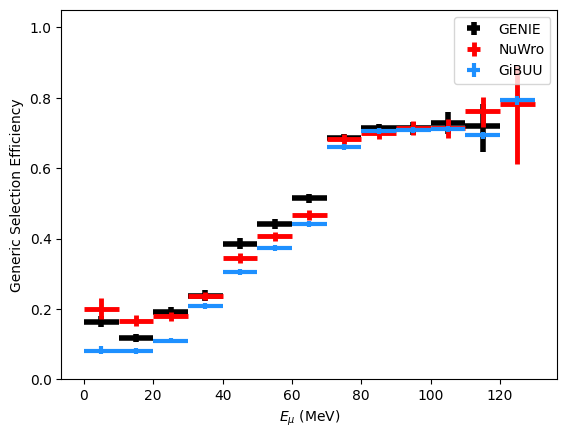

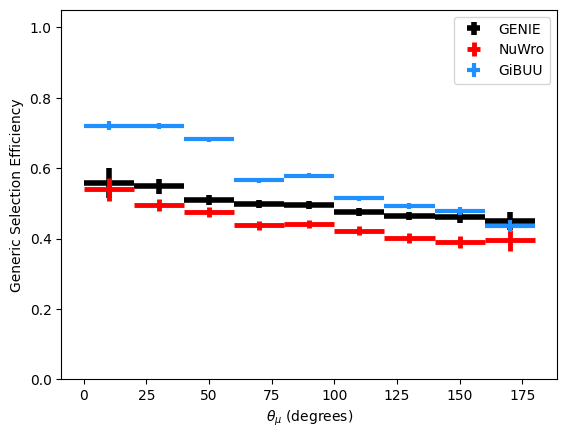

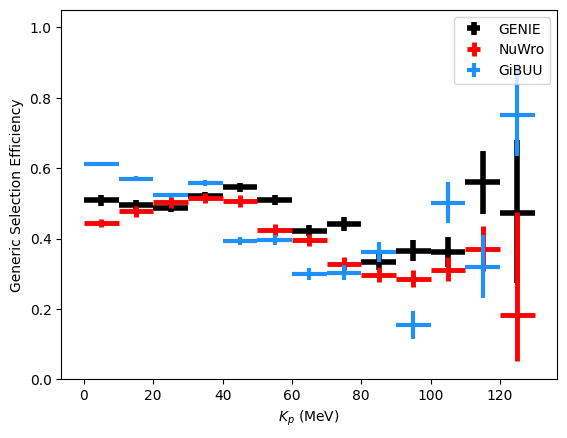

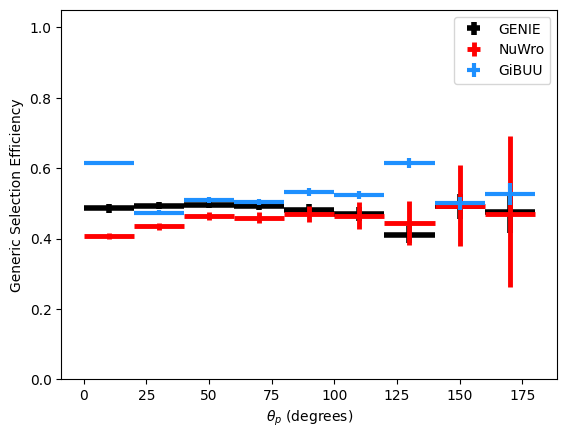

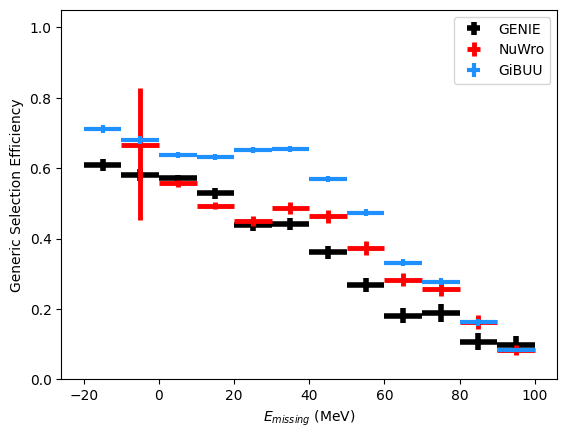

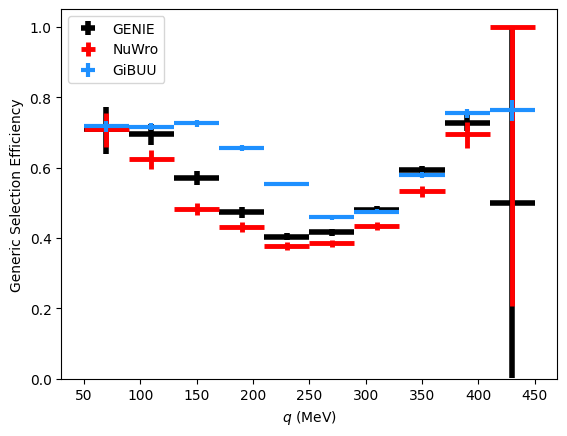

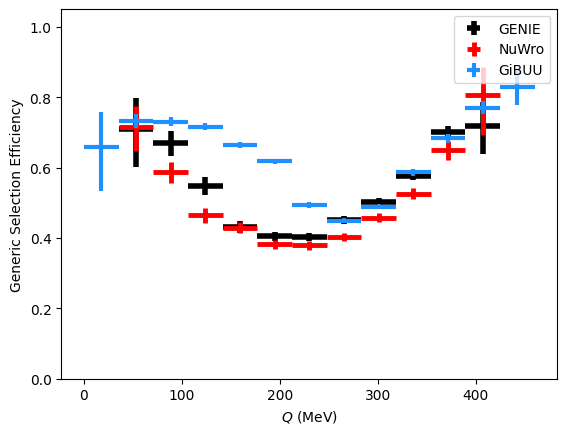

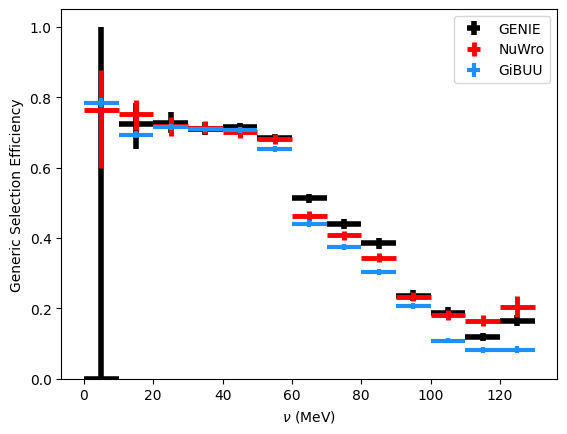

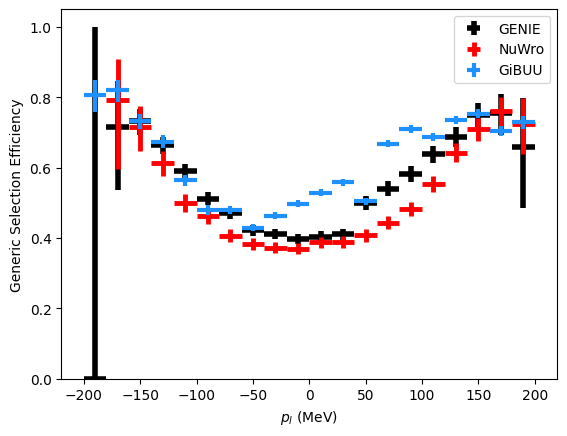

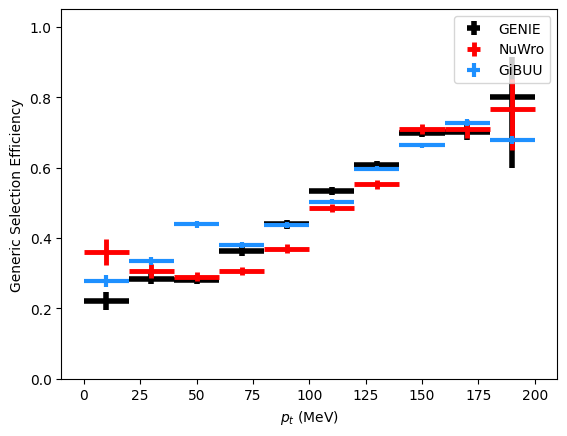

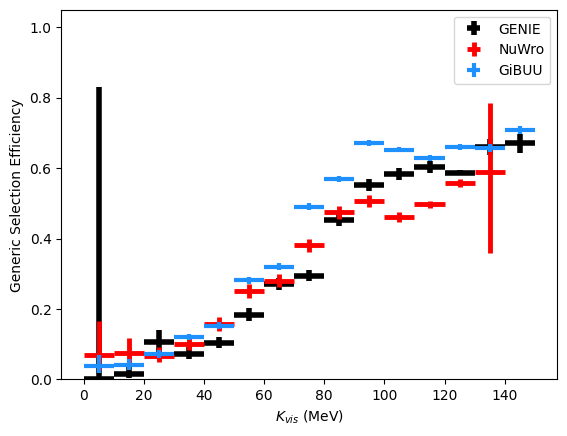

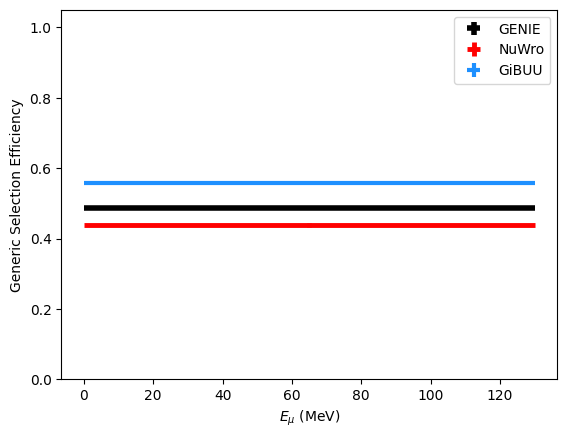

[0.48733574]
[0.43871892666828965]
[0.55733156]


In [19]:
no_gibuu_weights = True

truth_vars = ["truth_Emuon","true_angle_deg","truth_prim_p_energy","true_angle_P_deg","true_Em","true_q","true_sqrtQ2","true_nu","true_pl","true_pt","true_KE","truth_Emuon"]
xlabels = [f"$E_\mu$ (MeV)","$\\theta_\mu$ (degrees)",f"$K_p$ (MeV)","$\\theta_p$ (degrees)","$E_{missing}$ (MeV)","$q$ (MeV)","$Q$ (MeV)","$\\nu$ (MeV)","$p_l$ (MeV)","$p_t$ (MeV)","$K_{vis}$ (MeV)",f"$E_\mu$ (MeV)"]
bins_list = []
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(0,180,10))
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(0,180,10))
bins_list.append(np.linspace(-20,100,13))
bins_list.append(np.linspace(50,450,11))
bins_list.append(np.linspace(0,460,14))
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(-200,200,21))
bins_list.append(np.linspace(0,200,11))
bins_list.append(np.linspace(0,150,16))
bins_list.append(np.linspace(0,130,2))

sig_test_df = kdar_overlay_df.query("is_KDAR==1").copy()
sig_sel_test_df = kdar_overlay_df.query("is_KDAR==1").query("kine_reco_Enu>0").copy()

sig_nuwro_df = nuwro_df.query("is_KDAR==1").copy()
sig_sel_nuwro_df = nuwro_df.query("is_KDAR==1").query("kine_reco_Enu>0").copy()

sig_gibuu_df = gibuu_df.query("is_KDAR==1").copy()
sig_sel_gibuu_df = gibuu_df.query("is_KDAR==1").query("kine_reco_Enu>0").copy()

presel_eff = []
nuwro_presel_eff = []
gibuu_presel_eff = []

for i in range(len(truth_vars)):
    
    var = truth_vars[i]
    bins = bins_list[i]
    test_sig, x = np.histogram( np.clip(sig_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df['net_weight'].to_numpy())
    test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df['net_weight'].to_numpy())
    nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df['net_weight'].to_numpy())
    nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df['net_weight'].to_numpy())
    gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df['net_weight'].to_numpy())
    gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df['net_weight'].to_numpy())
    w_gibuu_sig = gibuu_sig
    w_gibuu_sig_sel = gibuu_sig_sel
    if no_gibuu_weights:
        w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
        w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
    if var == "truth_prim_proton_costheta":
        test_sig, x = np.histogram( np.clip(sig_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        w_gibuu_sig = gibuu_sig
        w_gibuu_sig_sel = gibuu_sig_sel
        if no_gibuu_weights:
            w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
            w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
        
    test_eff = []
    test_err = utils.wilson_err(test_sig_sel, test_sig)
    
    nuwro_eff = []
    nuwro_err = utils.wilson_err(nuwro_sig_sel, nuwro_sig)
    
    gibuu_eff = []
    gibuu_err = utils.wilson_err(w_gibuu_sig_sel, w_gibuu_sig)
    
    err_truth = utils.get_x_err_Enu(utils.get_bin_centers(bins),bins)

    for b in range(len(bins)-1):
        if test_sig[b]==0: test_eff.append(np.nan)
        else: test_eff.append(test_sig_sel[b]/test_sig[b])
        if nuwro_sig[b]==0: nuwro_eff.append(np.nan)
        else: nuwro_eff.append(nuwro_sig_sel[b]/nuwro_sig[b])
        if gibuu_sig[b]==0: gibuu_eff.append(np.nan)
        else: gibuu_eff.append(gibuu_sig_sel[b]/gibuu_sig[b])
            
    plt.figure()
    plt.errorbar(utils.get_bin_centers(bins),test_eff,xerr=err_truth,yerr=test_err,label='GENIE', ms=0, fmt='o',lw=4,color='black')
    plt.errorbar(utils.get_bin_centers(bins),nuwro_eff,xerr=err_truth,yerr=nuwro_err,label='NuWro', ms=0, fmt='o',lw=3.5,color='red')
    plt.errorbar(utils.get_bin_centers(bins),gibuu_eff,xerr=err_truth,yerr=gibuu_err,label='GiBUU', ms=0, fmt='o',lw=3,color='dodgerblue')
    plt.ylim(0,1.05)
    plt.xlabel(xlabels[i])
    plt.ylabel("Generic Selection Efficiency")
    plt.legend()
    plt.show()

    presel_eff.append(np.nan_to_num(test_eff,nan=0))
    nuwro_presel_eff.append(np.nan_to_num(nuwro_eff,nan=0))
    gibuu_presel_eff.append(np.nan_to_num(gibuu_eff,nan=0))
    
    if i == len(truth_vars)-1:
        print(test_eff)
        print(nuwro_eff)
        print(gibuu_eff)


In [15]:

print(np.sum(kdar_overlay_df.query("is_KDAR==1").query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(kdar_overlay_df.query("is_KDAR==1")["net_weight"].to_numpy()))
print(np.sum(kdar_overlay_df.query("is_KDAR==1").query("truth_Emuon<40").query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(kdar_overlay_df.query("is_KDAR==1").query("truth_Emuon<40")["net_weight"].to_numpy()))


0.4873355
0.17917539


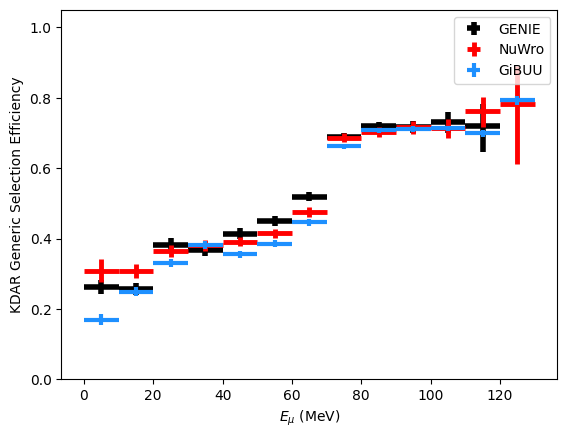

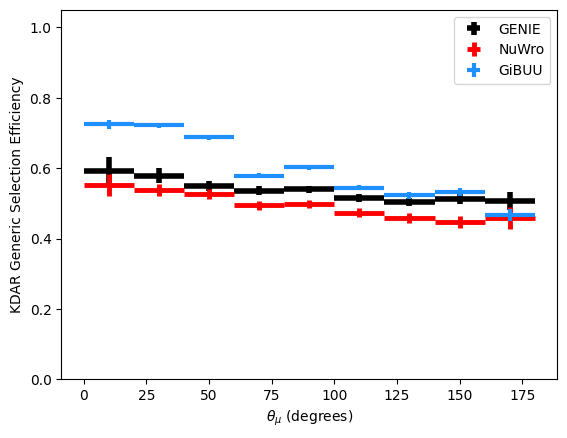

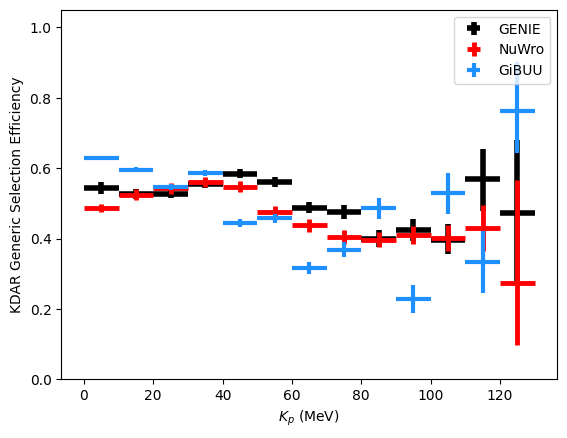

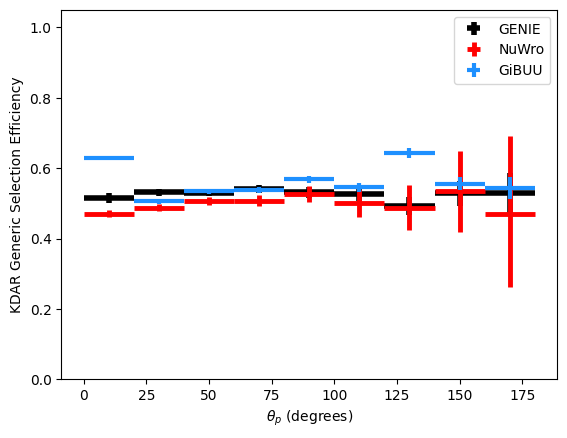

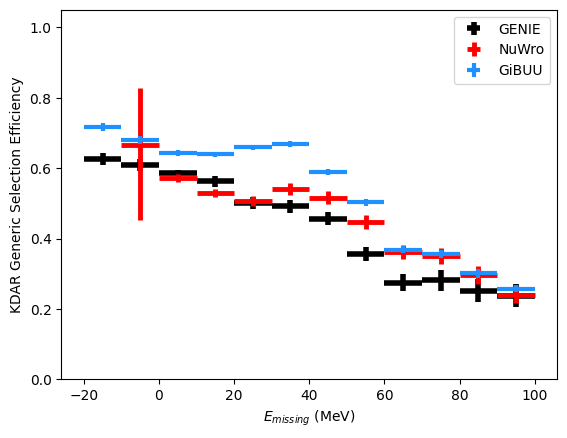

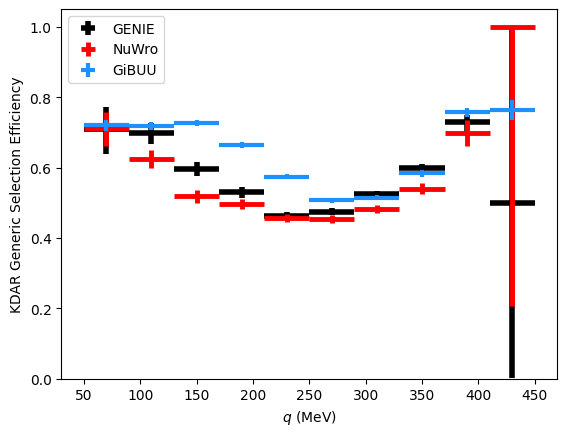

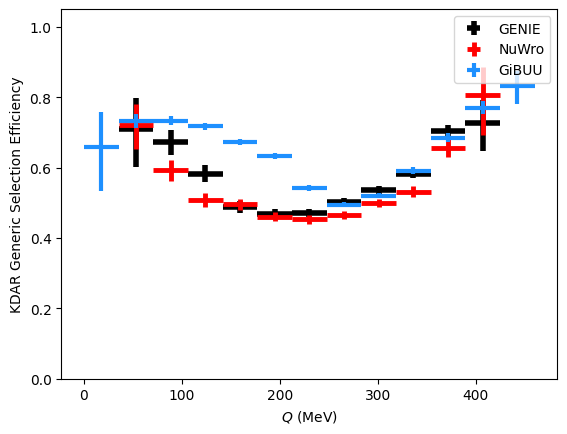

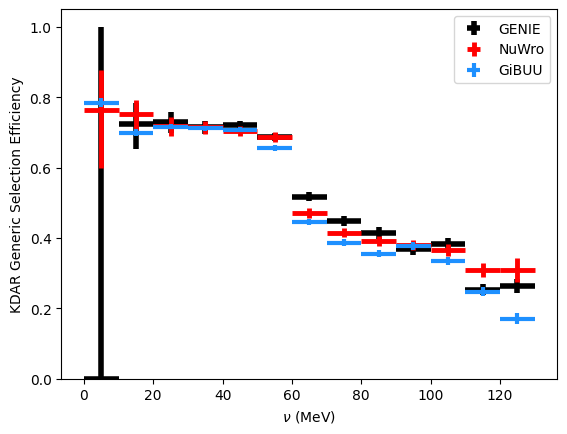

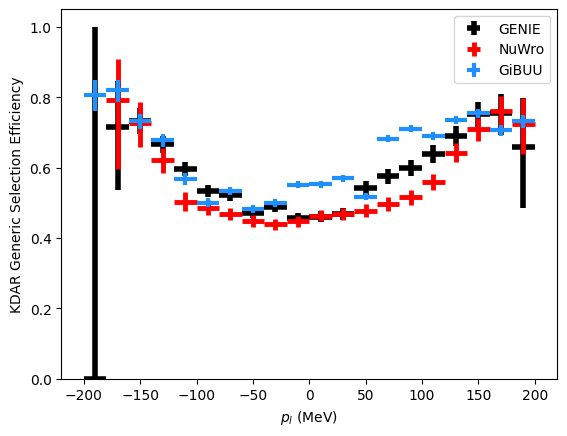

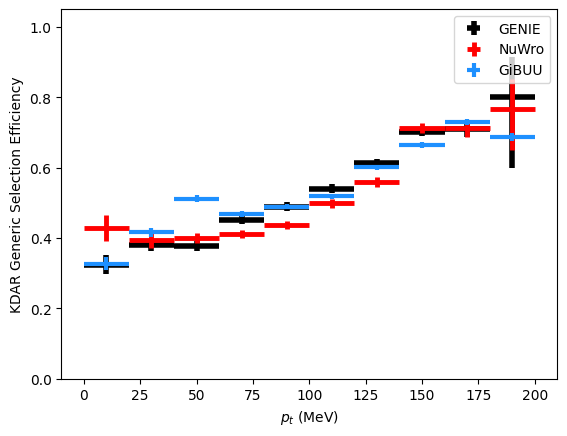

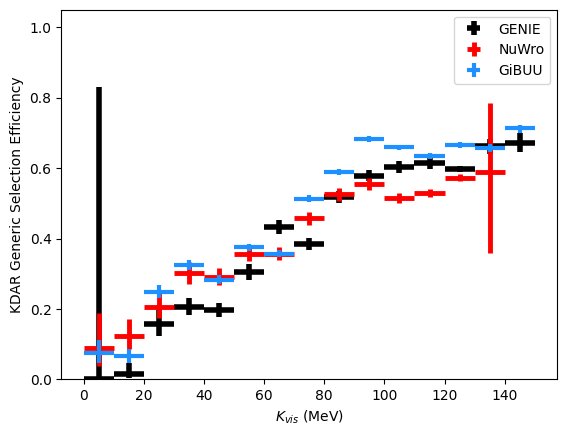

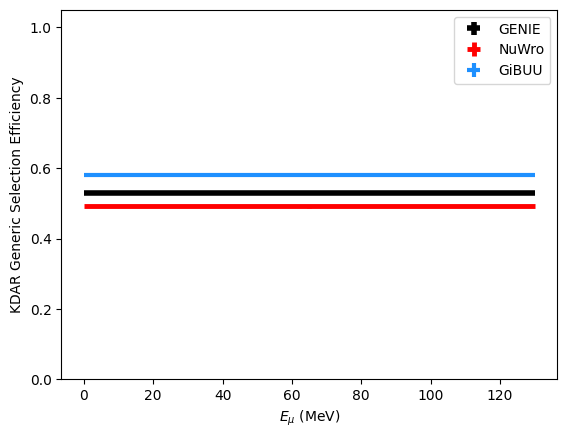

[0.5290023]
[0.4917363196191404]
[0.58147824]


In [26]:
no_gibuu_weights = True

truth_vars = ["truth_Emuon","true_angle_deg","truth_prim_p_energy","true_angle_P_deg","true_Em","true_q","true_sqrtQ2","true_nu","true_pl","true_pt","true_KE","truth_Emuon"]
xlabels = [f"$E_\mu$ (MeV)","$\\theta_\mu$ (degrees)",f"$K_p$ (MeV)","$\\theta_p$ (degrees)","$E_{missing}$ (MeV)","$q$ (MeV)","$Q$ (MeV)","$\\nu$ (MeV)","$p_l$ (MeV)","$p_t$ (MeV)","$K_{vis}$ (MeV)",f"$E_\mu$ (MeV)"]
bins_list = []
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(0,180,10))
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(0,180,10))
bins_list.append(np.linspace(-20,100,13))
bins_list.append(np.linspace(50,450,11))
bins_list.append(np.linspace(0,460,14))
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(-200,200,21))
bins_list.append(np.linspace(0,200,11))
bins_list.append(np.linspace(0,150,16))
bins_list.append(np.linspace(0,130,2))


sig_test_df = kdar_overlay_df.query("is_KDAR==1").copy()
sig_sel_test_df = kdar_overlay_df.query("is_KDAR==1").query("ssm_kine_reco_Enu>0").copy()

sig_nuwro_df = nuwro_df.query("is_KDAR==1").copy()
sig_sel_nuwro_df = nuwro_df.query("is_KDAR==1").query("ssm_kine_reco_Enu>0").copy()

sig_gibuu_df = gibuu_df.query("is_KDAR==1").copy()
sig_sel_gibuu_df = gibuu_df.query("is_KDAR==1").query("ssm_kine_reco_Enu>0").copy()

presel_eff = []
nuwro_presel_eff = []
gibuu_presel_eff = []

for i in range(len(truth_vars)):
    
    var = truth_vars[i]
    bins = bins_list[i]
    test_sig, x = np.histogram( np.clip(sig_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df['net_weight'].to_numpy())
    test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df['net_weight'].to_numpy())
    nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df['net_weight'].to_numpy())
    nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df['net_weight'].to_numpy())
    gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df['net_weight'].to_numpy())
    gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df['net_weight'].to_numpy())
    w_gibuu_sig = gibuu_sig
    w_gibuu_sig_sel = gibuu_sig_sel
    if no_gibuu_weights:
        w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
        w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
    if var == "truth_prim_proton_costheta":
        test_sig, x = np.histogram( np.clip(sig_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        w_gibuu_sig = gibuu_sig
        w_gibuu_sig_sel = gibuu_sig_sel
        if no_gibuu_weights:
            w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
            w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
        
    test_eff = []
    test_err = utils.wilson_err(test_sig_sel, test_sig)
    
    nuwro_eff = []
    nuwro_err = utils.wilson_err(nuwro_sig_sel, nuwro_sig)
    
    gibuu_eff = []
    gibuu_err = utils.wilson_err(w_gibuu_sig_sel, w_gibuu_sig)
    
    err_truth = utils.get_x_err_Enu(utils.get_bin_centers(bins),bins)

    for b in range(len(bins)-1):
        if test_sig[b]==0: test_eff.append(np.nan)
        else: test_eff.append(test_sig_sel[b]/test_sig[b])
        if nuwro_sig[b]==0: nuwro_eff.append(np.nan)
        else: nuwro_eff.append(nuwro_sig_sel[b]/nuwro_sig[b])
        if gibuu_sig[b]==0: gibuu_eff.append(np.nan)
        else: gibuu_eff.append(gibuu_sig_sel[b]/gibuu_sig[b])
            
    plt.figure()
    plt.errorbar(utils.get_bin_centers(bins),test_eff,xerr=err_truth,yerr=test_err,label='GENIE', ms=0, fmt='o',lw=4,color='black')
    plt.errorbar(utils.get_bin_centers(bins),nuwro_eff,xerr=err_truth,yerr=nuwro_err,label='NuWro', ms=0, fmt='o',lw=3.5,color='red')
    plt.errorbar(utils.get_bin_centers(bins),gibuu_eff,xerr=err_truth,yerr=gibuu_err,label='GiBUU', ms=0, fmt='o',lw=3,color='dodgerblue')
    plt.ylim(0,1.05)
    plt.xlabel(xlabels[i])
    plt.ylabel("KDAR Generic Selection Efficiency")
    plt.legend()
    plt.show()

    presel_eff.append(np.nan_to_num(test_eff,nan=0))
    nuwro_presel_eff.append(np.nan_to_num(nuwro_eff,nan=0))
    gibuu_presel_eff.append(np.nan_to_num(gibuu_eff,nan=0))
    
    if i == len(truth_vars)-1:
        print(test_eff)
        print(nuwro_eff)
        print(gibuu_eff)


In [17]:

print(np.sum(kdar_overlay_df.query("is_KDAR==1").query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(kdar_overlay_df.query("is_KDAR==1")["net_weight"].to_numpy()))
print(np.sum(kdar_overlay_df.query("is_KDAR==1").query("truth_Emuon<40").query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(kdar_overlay_df.query("is_KDAR==1").query("truth_Emuon<40")["net_weight"].to_numpy()))


0.5290027
0.32216588


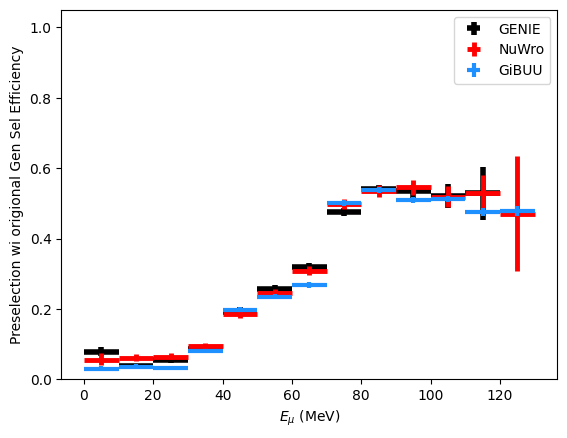

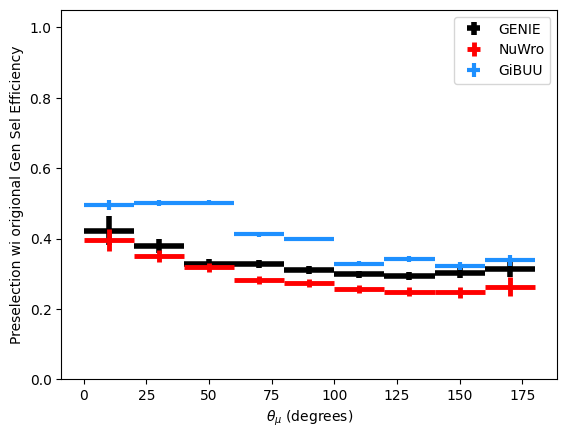

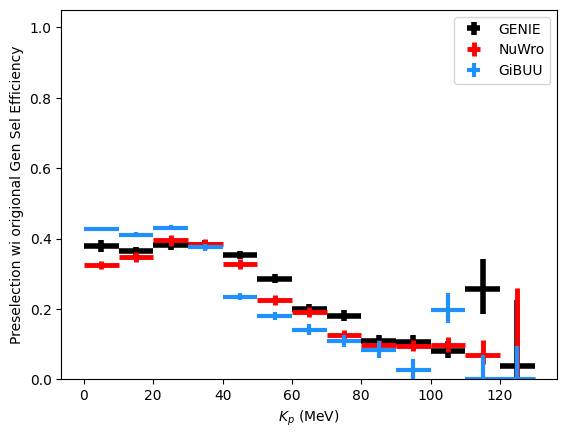

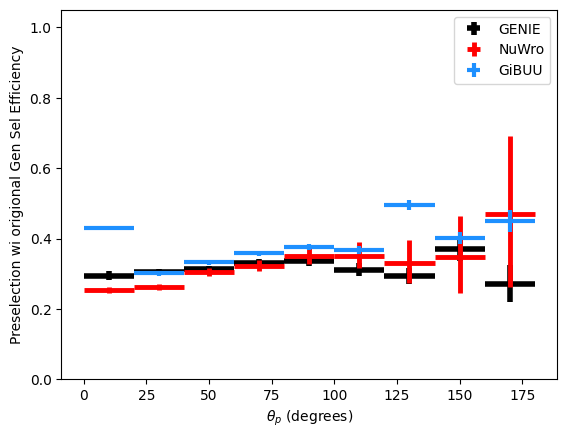

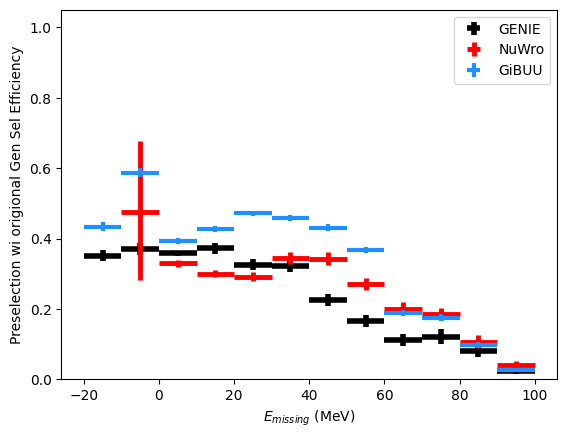

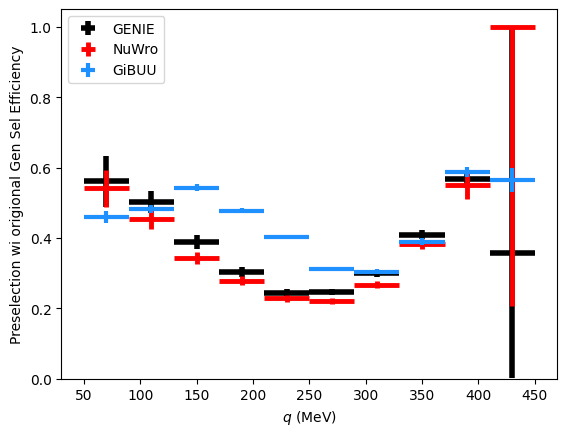

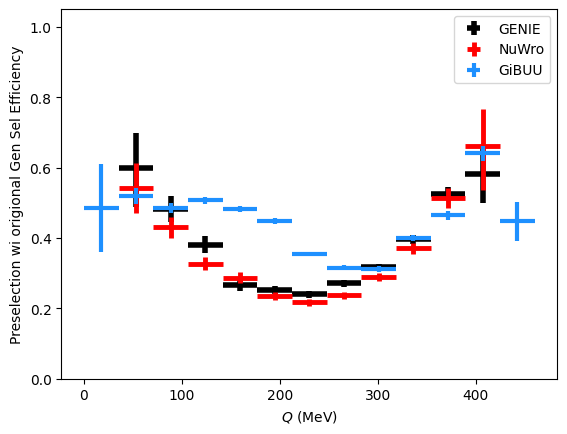

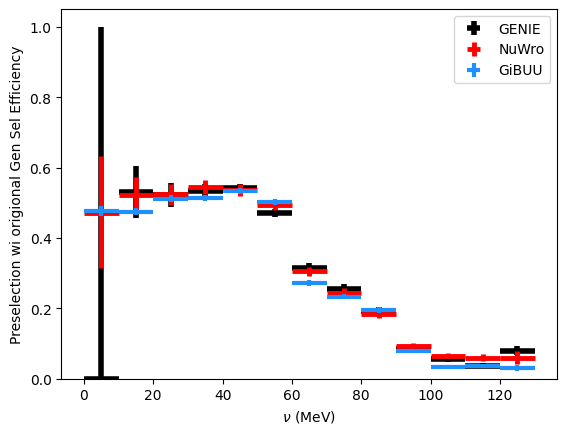

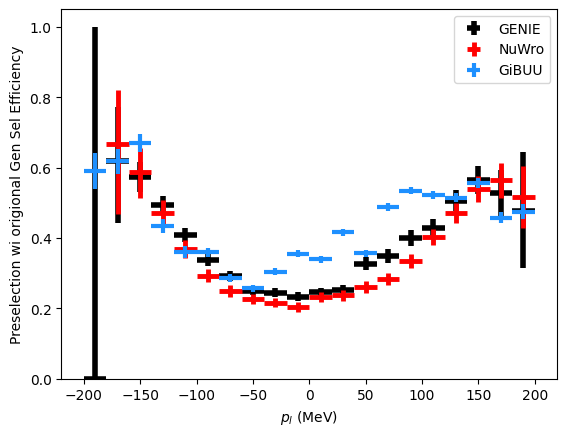

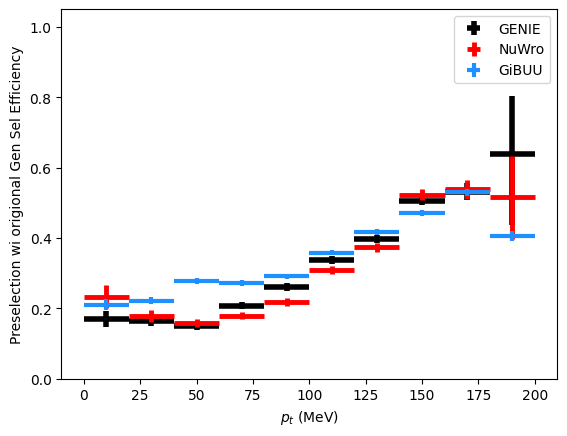

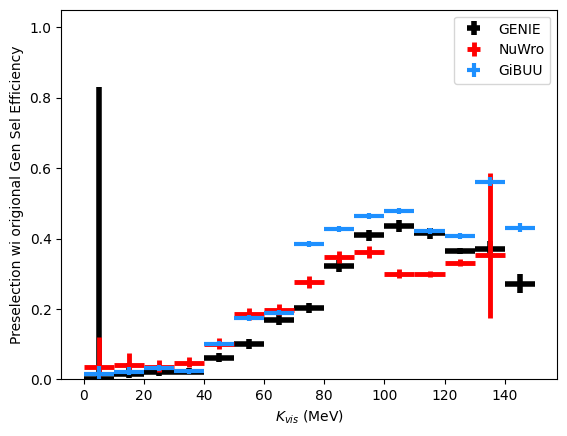

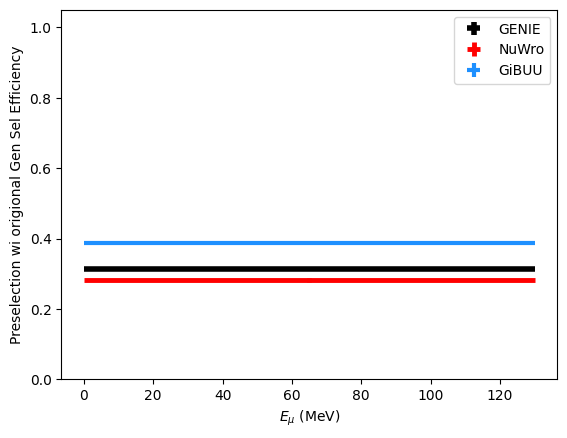

In [27]:
no_gibuu_weights = True

truth_vars = ["truth_Emuon","true_angle_deg","truth_prim_p_energy","true_angle_P_deg","true_Em","true_q","true_sqrtQ2","true_nu","true_pl","true_pt","true_KE","truth_Emuon"]
xlabels = [f"$E_\mu$ (MeV)","$\\theta_\mu$ (degrees)",f"$K_p$ (MeV)","$\\theta_p$ (degrees)","$E_{missing}$ (MeV)","$q$ (MeV)","$Q$ (MeV)","$\\nu$ (MeV)","$p_l$ (MeV)","$p_t$ (MeV)","$K_{vis}$ (MeV)",f"$E_\mu$ (MeV)"]
bins_list = []
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(0,180,10))
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(0,180,10))
bins_list.append(np.linspace(-20,100,13))
bins_list.append(np.linspace(50,450,11))
bins_list.append(np.linspace(0,460,14))
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(-200,200,21))
bins_list.append(np.linspace(0,200,11))
bins_list.append(np.linspace(0,150,16))
bins_list.append(np.linspace(0,130,2))

sig_test_df = kdar_overlay_df.query("is_KDAR==1").copy()
sig_sel_test_df = kdar_overlay_df.query("is_KDAR==1").query(presel_query).query("kine_reco_Enu>0").copy()

sig_nuwro_df = nuwro_df.query("is_KDAR==1").copy()
sig_sel_nuwro_df = nuwro_df.query("is_KDAR==1").query(presel_query).query("kine_reco_Enu>0").copy()

sig_gibuu_df = gibuu_df.query("is_KDAR==1").copy()
sig_sel_gibuu_df = gibuu_df.query("is_KDAR==1").query(presel_query).query("kine_reco_Enu>0").copy()

presel_eff = []
nuwro_presel_eff = []
gibuu_presel_eff = []

for i in range(len(truth_vars)):
    
    var = truth_vars[i]
    bins = bins_list[i]
    test_sig, x = np.histogram( np.clip(sig_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df['net_weight'].to_numpy())
    test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df['net_weight'].to_numpy())
    nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df['net_weight'].to_numpy())
    nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df['net_weight'].to_numpy())
    gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df['net_weight'].to_numpy())
    gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df['net_weight'].to_numpy())
    w_gibuu_sig = gibuu_sig
    w_gibuu_sig_sel = gibuu_sig_sel
    if no_gibuu_weights:
        w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
        w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
    if var == "truth_prim_proton_costheta":
        test_sig, x = np.histogram( np.clip(sig_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        w_gibuu_sig = gibuu_sig
        w_gibuu_sig_sel = gibuu_sig_sel
        if no_gibuu_weights:
            w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
            w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
        
    test_eff = []
    test_err = utils.wilson_err(test_sig_sel, test_sig)
    
    nuwro_eff = []
    nuwro_err = utils.wilson_err(nuwro_sig_sel, nuwro_sig)
    
    gibuu_eff = []
    gibuu_err = utils.wilson_err(w_gibuu_sig_sel, w_gibuu_sig)
    
    err_truth = utils.get_x_err_Enu(utils.get_bin_centers(bins),bins)

    for b in range(len(bins)-1):
        if test_sig[b]==0: test_eff.append(np.nan)
        else: test_eff.append(test_sig_sel[b]/test_sig[b])
        if nuwro_sig[b]==0: nuwro_eff.append(np.nan)
        else: nuwro_eff.append(nuwro_sig_sel[b]/nuwro_sig[b])
        if gibuu_sig[b]==0: gibuu_eff.append(np.nan)
        else: gibuu_eff.append(gibuu_sig_sel[b]/gibuu_sig[b])
            
    plt.figure()
    plt.errorbar(utils.get_bin_centers(bins),test_eff,xerr=err_truth,yerr=test_err,label='GENIE', ms=0, fmt='o',lw=4,color='black')
    plt.errorbar(utils.get_bin_centers(bins),nuwro_eff,xerr=err_truth,yerr=nuwro_err,label='NuWro', ms=0, fmt='o',lw=3.5,color='red')
    plt.errorbar(utils.get_bin_centers(bins),gibuu_eff,xerr=err_truth,yerr=gibuu_err,label='GiBUU', ms=0, fmt='o',lw=3,color='dodgerblue')
    plt.ylim(0,1.05)
    plt.xlabel(xlabels[i])
    plt.ylabel("Preselection wi origional Gen Sel Efficiency")
    plt.legend()
    plt.show()

    presel_eff.append(np.nan_to_num(test_eff,nan=0))
    nuwro_presel_eff.append(np.nan_to_num(nuwro_eff,nan=0))
    gibuu_presel_eff.append(np.nan_to_num(gibuu_eff,nan=0))


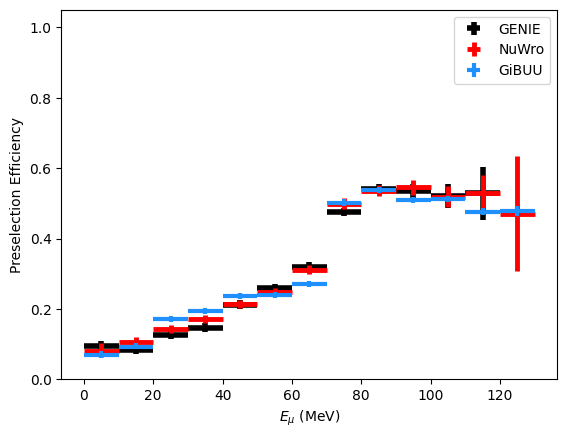

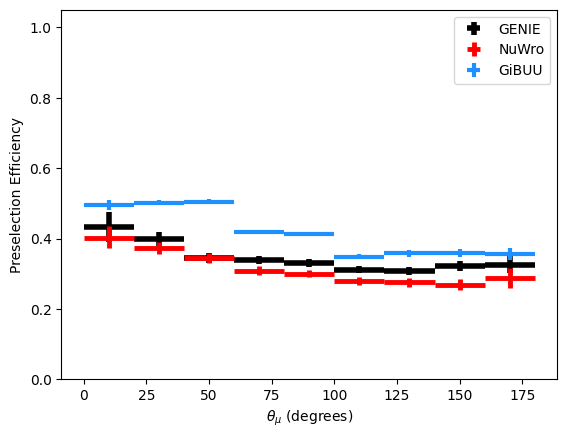

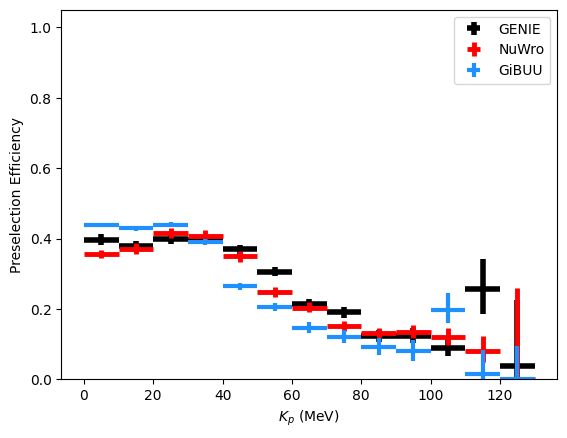

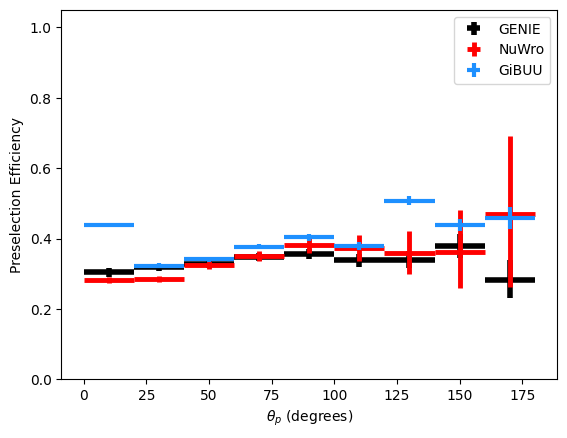

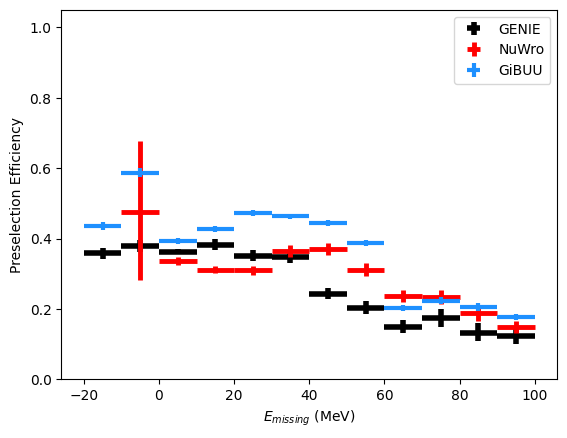

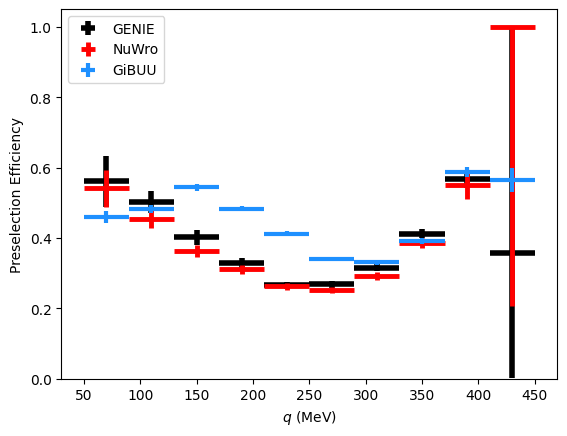

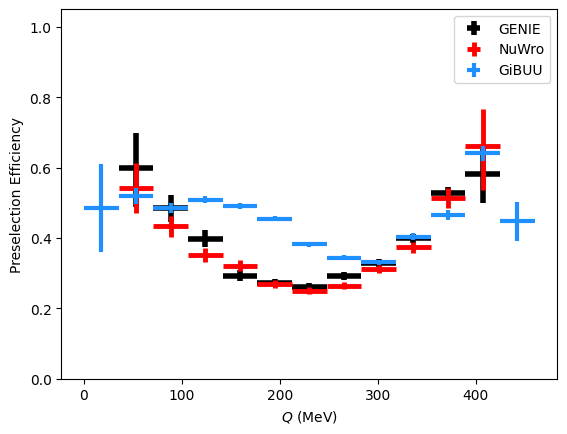

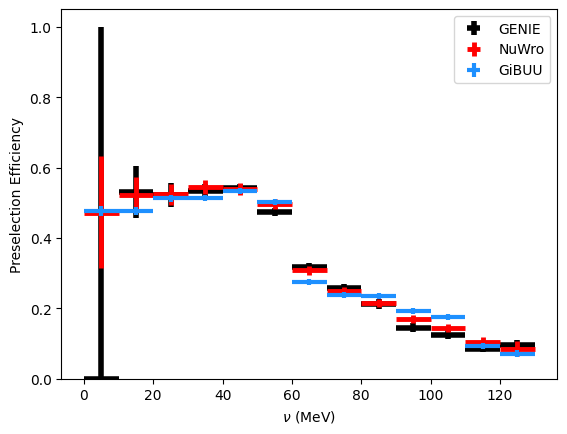

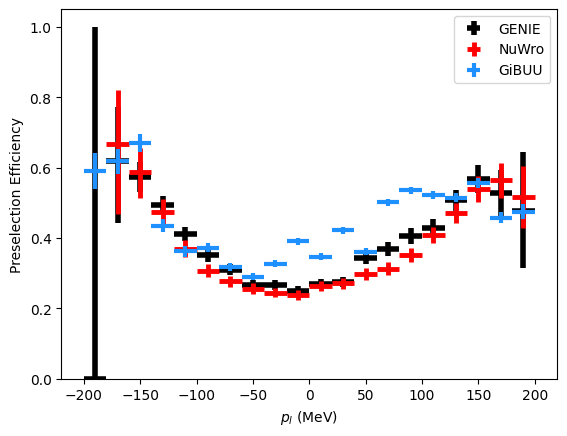

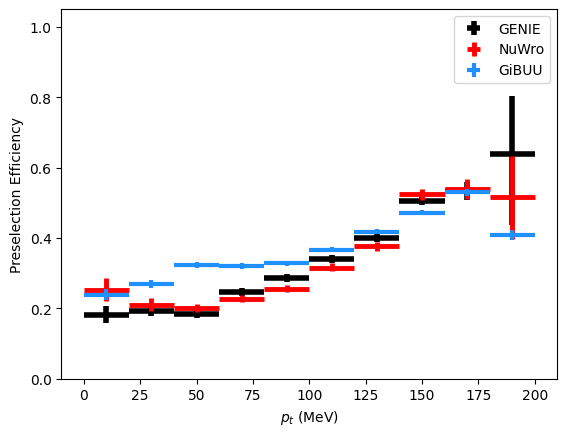

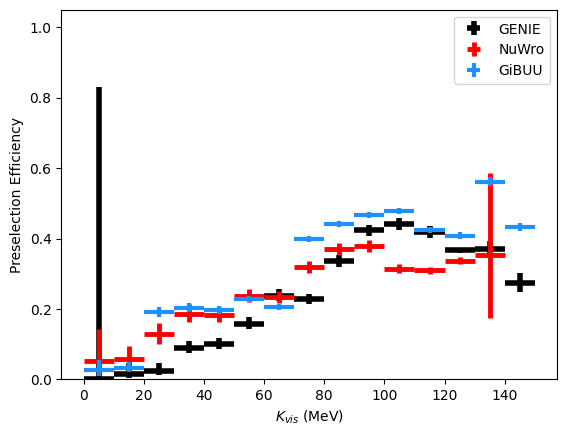

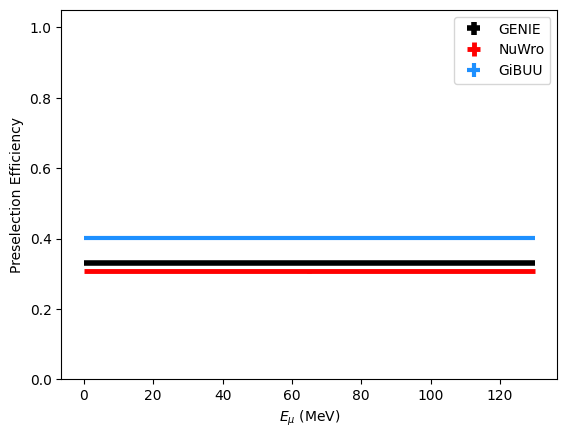

In [28]:
no_gibuu_weights = True

truth_vars = ["truth_Emuon","true_angle_deg","truth_prim_p_energy","true_angle_P_deg","true_Em","true_q","true_sqrtQ2","true_nu","true_pl","true_pt","true_KE","truth_Emuon"]
xlabels = [f"$E_\mu$ (MeV)","$\\theta_\mu$ (degrees)",f"$K_p$ (MeV)","$\\theta_p$ (degrees)","$E_{missing}$ (MeV)","$q$ (MeV)","$Q$ (MeV)","$\\nu$ (MeV)","$p_l$ (MeV)","$p_t$ (MeV)","$K_{vis}$ (MeV)",f"$E_\mu$ (MeV)"]
bins_list = []
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(0,180,10))
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(0,180,10))
bins_list.append(np.linspace(-20,100,13))
bins_list.append(np.linspace(50,450,11))
bins_list.append(np.linspace(0,460,14))
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(-200,200,21))
bins_list.append(np.linspace(0,200,11))
bins_list.append(np.linspace(0,150,16))
bins_list.append(np.linspace(0,130,2))

sig_test_df = kdar_overlay_df.query("is_KDAR==1").copy()
sig_sel_test_df = kdar_overlay_df.query("is_KDAR==1").query(presel_query).copy()

sig_nuwro_df = nuwro_df.query("is_KDAR==1").copy()
sig_sel_nuwro_df = nuwro_df.query("is_KDAR==1").query(presel_query).copy()

sig_gibuu_df = gibuu_df.query("is_KDAR==1").copy()
sig_sel_gibuu_df = gibuu_df.query("is_KDAR==1").query(presel_query).copy()

presel_eff = []
nuwro_presel_eff = []
gibuu_presel_eff = []

for i in range(len(truth_vars)):
    
    var = truth_vars[i]
    bins = bins_list[i]
    test_sig, x = np.histogram( np.clip(sig_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df['net_weight'].to_numpy())
    test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df['net_weight'].to_numpy())
    nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df['net_weight'].to_numpy())
    nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df['net_weight'].to_numpy())
    gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df['net_weight'].to_numpy())
    gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df['net_weight'].to_numpy())
    w_gibuu_sig = gibuu_sig
    w_gibuu_sig_sel = gibuu_sig_sel
    if no_gibuu_weights:
        w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
        w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
    if var == "truth_prim_proton_costheta":
        test_sig, x = np.histogram( np.clip(sig_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        w_gibuu_sig = gibuu_sig
        w_gibuu_sig_sel = gibuu_sig_sel
        if no_gibuu_weights:
            w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
            w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
        
    test_eff = []
    test_err = utils.wilson_err(test_sig_sel, test_sig)
    
    nuwro_eff = []
    nuwro_err = utils.wilson_err(nuwro_sig_sel, nuwro_sig)
    
    gibuu_eff = []
    gibuu_err = utils.wilson_err(w_gibuu_sig_sel, w_gibuu_sig)
    
    err_truth = utils.get_x_err_Enu(utils.get_bin_centers(bins),bins)

    for b in range(len(bins)-1):
        if test_sig[b]==0: test_eff.append(np.nan)
        else: test_eff.append(test_sig_sel[b]/test_sig[b])
        if nuwro_sig[b]==0: nuwro_eff.append(np.nan)
        else: nuwro_eff.append(nuwro_sig_sel[b]/nuwro_sig[b])
        if gibuu_sig[b]==0: gibuu_eff.append(np.nan)
        else: gibuu_eff.append(gibuu_sig_sel[b]/gibuu_sig[b])
            
    plt.figure()
    plt.errorbar(utils.get_bin_centers(bins),test_eff,xerr=err_truth,yerr=test_err,label='GENIE', ms=0, fmt='o',lw=4,color='black')
    plt.errorbar(utils.get_bin_centers(bins),nuwro_eff,xerr=err_truth,yerr=nuwro_err,label='NuWro', ms=0, fmt='o',lw=3.5,color='red')
    plt.errorbar(utils.get_bin_centers(bins),gibuu_eff,xerr=err_truth,yerr=gibuu_err,label='GiBUU', ms=0, fmt='o',lw=3,color='dodgerblue')
    plt.ylim(0,1.05)
    plt.xlabel(xlabels[i])
    plt.ylabel("Preselection Efficiency")
    plt.legend()
    plt.show()

    presel_eff.append(np.nan_to_num(test_eff,nan=0))
    nuwro_presel_eff.append(np.nan_to_num(nuwro_eff,nan=0))
    gibuu_presel_eff.append(np.nan_to_num(gibuu_eff,nan=0))


In [29]:
no_gibuu_weights = True
kdar_score_hiE_cut = 0.8
kdar_score_lowE_cut = 0.8

truth_vars = ["truth_Emuon","true_angle_deg","truth_prim_p_energy","true_angle_P_deg","true_Em","true_q","true_sqrtQ2","true_nu","true_pl","true_pt","true_KE","truth_Emuon"]
xlabels = [f"$E_\mu$ (MeV)","$\\theta_\mu$ (degrees)",f"$K_p$ (MeV)","$\\theta_p$ (degrees)","$E_{missing}$ (MeV)","$q$ (MeV)","$Q$ (MeV)","$\\nu$ (MeV)","$p_l$ (MeV)","$p_t$ (MeV)","$K_{vis}$ (MeV)",f"$E_\mu$ (MeV)"]
bins_list = []
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(0,180,10))
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(0,180,10))
bins_list.append(np.linspace(-20,100,13))
bins_list.append(np.linspace(50,450,11))
bins_list.append(np.linspace(0,460,14))
bins_list.append(np.linspace(0,130,14))
bins_list.append(np.linspace(-200,200,21))
bins_list.append(np.linspace(0,200,11))
bins_list.append(np.linspace(0,150,16))
bins_list.append(np.linspace(0,130,2))

sig_test_df = kdar_overlay_df.query("is_KDAR==1").copy()
sig_sel_test_df = kdar_overlay_df.query("is_KDAR==1").query(presel_query).query(f"kdar_score_hiE>{kdar_score_hiE_cut}").query(f"kdar_score_lowE>{kdar_score_lowE_cut}").copy()

sig_nuwro_df = nuwro_df.query("is_KDAR==1").copy()
sig_sel_nuwro_df = nuwro_df.query("is_KDAR==1").query(presel_query).copy()

sig_gibuu_df = gibuu_df.query("is_KDAR==1").copy()
sig_sel_gibuu_df = gibuu_df.query("is_KDAR==1").query(presel_query).copy()

presel_eff = []
nuwro_presel_eff = []
gibuu_presel_eff = []

for i in range(len(truth_vars)):
    
    var = truth_vars[i]
    bins = bins_list[i]
    test_sig, x = np.histogram( np.clip(sig_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df['net_weight'].to_numpy())
    test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df['net_weight'].to_numpy())
    nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df['net_weight'].to_numpy())
    nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df['net_weight'].to_numpy())
    gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df['net_weight'].to_numpy())
    gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df['net_weight'].to_numpy())
    w_gibuu_sig = gibuu_sig
    w_gibuu_sig_sel = gibuu_sig_sel
    if no_gibuu_weights:
        w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
        w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
    if var == "truth_prim_proton_costheta":
        test_sig, x = np.histogram( np.clip(sig_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
        w_gibuu_sig = gibuu_sig
        w_gibuu_sig_sel = gibuu_sig_sel
        if no_gibuu_weights:
            w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
            w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
        
    test_eff = []
    test_err = utils.wilson_err(test_sig_sel, test_sig)
    
    nuwro_eff = []
    nuwro_err = utils.wilson_err(nuwro_sig_sel, nuwro_sig)
    
    gibuu_eff = []
    gibuu_err = utils.wilson_err(w_gibuu_sig_sel, w_gibuu_sig)
    
    err_truth = utils.get_x_err_Enu(utils.get_bin_centers(bins),bins)

    for b in range(len(bins)-1):
        if test_sig[b]==0: test_eff.append(np.nan)
        else: test_eff.append(test_sig_sel[b]/test_sig[b])
        if nuwro_sig[b]==0: nuwro_eff.append(np.nan)
        else: nuwro_eff.append(nuwro_sig_sel[b]/nuwro_sig[b])
        if gibuu_sig[b]==0: gibuu_eff.append(np.nan)
        else: gibuu_eff.append(gibuu_sig_sel[b]/gibuu_sig[b])
            
    plt.figure()
    plt.errorbar(utils.get_bin_centers(bins),test_eff,xerr=err_truth,yerr=test_err,label='GENIE', ms=0, fmt='o',lw=4,color='black')
    plt.errorbar(utils.get_bin_centers(bins),nuwro_eff,xerr=err_truth,yerr=nuwro_err,label='NuWro', ms=0, fmt='o',lw=3.5,color='red')
    plt.errorbar(utils.get_bin_centers(bins),gibuu_eff,xerr=err_truth,yerr=gibuu_err,label='GiBUU', ms=0, fmt='o',lw=3,color='dodgerblue')
    plt.ylim(0,1.05)
    plt.xlabel(xlabels[i])
    plt.ylabel("BDT Selection Efficiency")
    plt.legend()
    plt.show()

    presel_eff.append(np.nan_to_num(test_eff,nan=0))
    nuwro_presel_eff.append(np.nan_to_num(nuwro_eff,nan=0))
    gibuu_presel_eff.append(np.nan_to_num(gibuu_eff,nan=0))


UndefinedVariableError: name 'kdar_score_hiE' is not defined

In [23]:

print(np.sum(kdar_overlay_df.query("is_KDAR==1").query("ssm_kine_energy>0")["net_weight"].to_numpy())/np.sum(kdar_overlay_df.query("is_KDAR==1")["net_weight"].to_numpy()))
print(np.sum(kdar_overlay_df.query("is_KDAR==1").query("ssm_kine_energy>0").query("ssm_pdg==13")["net_weight"].to_numpy())/np.sum(kdar_overlay_df.query("is_KDAR==1")["net_weight"].to_numpy()))


0.39868504
0.26270056


In [24]:

print(np.sum(nuwro_df.query("is_KDAR==1").query("ssm_kine_energy>0")["net_weight"].to_numpy())/np.sum(nuwro_df.query("is_KDAR==1")["net_weight"].to_numpy()))
print(np.sum(nuwro_df.query("is_KDAR==1").query("ssm_kine_energy>0").query("ssm_pdg==13")["net_weight"].to_numpy())/np.sum(nuwro_df.query("is_KDAR==1")["net_weight"].to_numpy()))


0.3693364710974059
0.2403364981470962


In [25]:

print(np.sum(gibuu_df.query("is_KDAR==1").query("ssm_kine_energy>0")["net_weight"].to_numpy())/np.sum(gibuu_df.query("is_KDAR==1")["net_weight"].to_numpy()))
print(np.sum(gibuu_df.query("is_KDAR==1").query("ssm_kine_energy>0").query("ssm_pdg==13")["net_weight"].to_numpy())/np.sum(gibuu_df.query("is_KDAR==1")["net_weight"].to_numpy()))


0.5043417
0.37657404
